In [1]:
####### import libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mtick
%matplotlib inline 
from scipy.stats import norm

import seaborn as sns

In [2]:
#data 
df_airbnb = pd.read_csv("AB_NYC_2019.csv") ## pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
display(df_airbnb)
df_airbnb.describe()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [3]:
df_airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
idsUnique = len(set(df_airbnb['id']))
idsTotal = df_airbnb.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
#drop id col
df_airbnb.drop(['id'],axis =1,inplace=True)

df_airbnb.shape

0


(48895, 15)

In [5]:
######handling missing values

print(np.any(df_airbnb.isna()))

df_airbnb.isnull().sum()

True


name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
print("Find most important features relative to target")
corr = df_airbnb.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

Find most important features relative to target
price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
host_id                           0.015309
reviews_per_month                -0.030608
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64


In [7]:
print(df_airbnb.shape)

df_airbnb.fillna({'reviews_per_month': 0}, inplace= True)



(48895, 15)


In [8]:
df_airbnb.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df_airbnb.drop(['name','host_name','last_review'], axis=1, inplace=True)
df_airbnb

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [10]:
######## Outliers



df_airbnb= df_airbnb.drop(df_airbnb[(df_airbnb['minimum_nights']>365)].index)
df_airbnb= df_airbnb.drop(df_airbnb[(df_airbnb['number_of_reviews']>500)].index)
df_airbnb= df_airbnb.drop(df_airbnb[(df_airbnb['calculated_host_listings_count']>100)].index)
df_airbnb= df_airbnb.drop(df_airbnb[(df_airbnb['price']>1800)].index)
df_airbnb= df_airbnb.drop(df_airbnb[(df_airbnb['price']<1)].index)

df_airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.796200e+04,47962.000000,47962.000000,47962.000000,47962.000000,47962.000000,47962.000000,47962.000000,47962.000000
mean,6.635704e+07,40.728804,-73.951599,142.747571,6.519599,23.580668,1.100347,3.395563,109.856365
std,7.811386e+07,0.054881,0.046162,131.386068,16.096102,44.306458,1.599795,9.914673,130.402201
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.603955e+06,40.689620,-73.982420,69.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,2.986915e+07,40.722800,-73.955260,105.000000,2.000000,5.000000,0.380000,1.000000,41.000000
75%,1.044658e+08,40.763317,-73.935823,175.000000,5.000000,24.000000,1.610000,2.000000,217.000000
max,2.743213e+08,40.913060,-73.712990,1800.000000,365.000000,488.000000,58.500000,96.000000,365.000000


<AxesSubplot:>

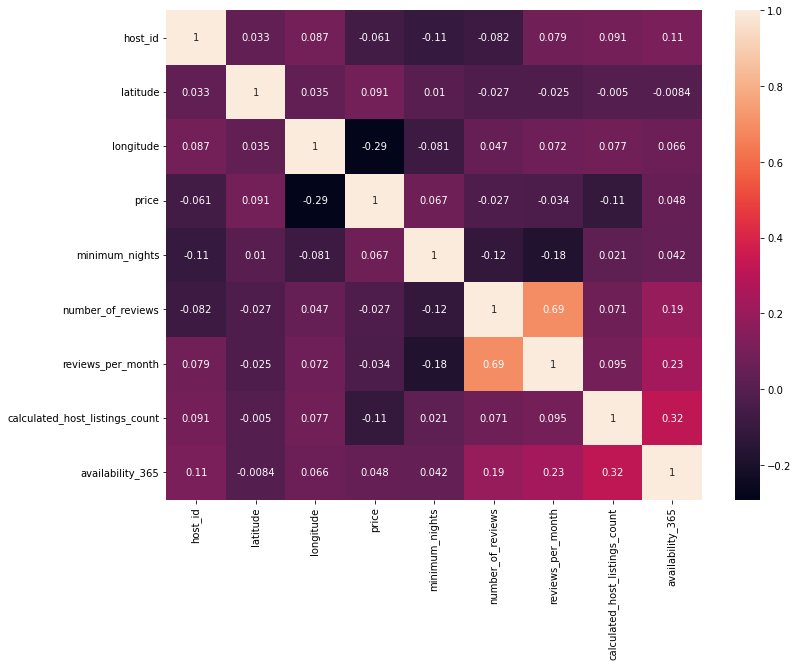

In [11]:
############### Data Visualization ######################

corrmat = df_airbnb.corr(method='kendall')
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot = True)

In [12]:
df_airbnb['neighbourhood_group'].value_counts()


Manhattan        20869
Brooklyn         20056
Queens            5576
Bronx             1089
Staten Island      372
Name: neighbourhood_group, dtype: int64

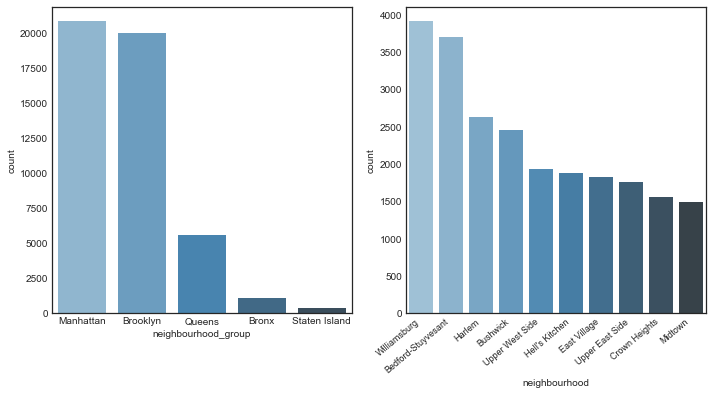

In [13]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
#Neighbourhood group
plt.subplot(221)
sns.countplot(x="neighbourhood_group", data=df_airbnb, palette="Blues_d",
              order=df_airbnb.neighbourhood_group.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)

#Top 10 Neighbourhood
plt.subplot(222)
ax=sns.countplot(x="neighbourhood", data=df_airbnb, palette="Blues_d",
              order=df_airbnb.neighbourhood.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

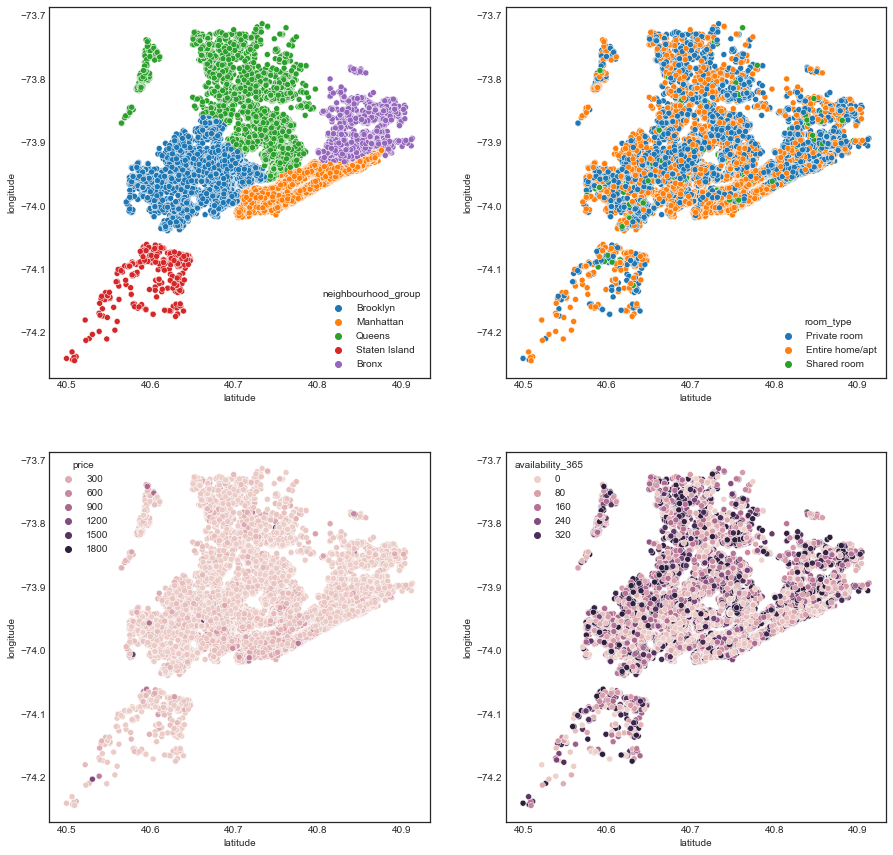

In [14]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude",hue="neighbourhood_group", data=df_airbnb)
plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude",hue="room_type", data=df_airbnb)
plt.subplot(223)
sns.scatterplot(x="latitude", y="longitude",hue="price", data=df_airbnb)
plt.subplot(224)
sns.scatterplot(x="latitude", y="longitude",hue="availability_365", data=df_airbnb)

In [15]:
df_airbnb.isnull().sum()
df_airbnb.dropna(how='any',inplace=True)
np.any(df_airbnb.isna())

False

In [16]:
print("Find most important features relative to target")
corr = df_airbnb.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

Find most important features relative to target
price                             1.000000
availability_365                  0.100313
latitude                          0.054906
calculated_host_listings_count    0.050885
host_id                           0.019705
minimum_nights                    0.016055
number_of_reviews                -0.053392
reviews_per_month                -0.057007
longitude                        -0.231372
Name: price, dtype: float64


In [17]:
df_airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [18]:
def get_count(series, limit=None):  
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values



In [19]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'): 
    fig, ax = plt.subplots(figsize=figsize)
    
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

C:\Users\candy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


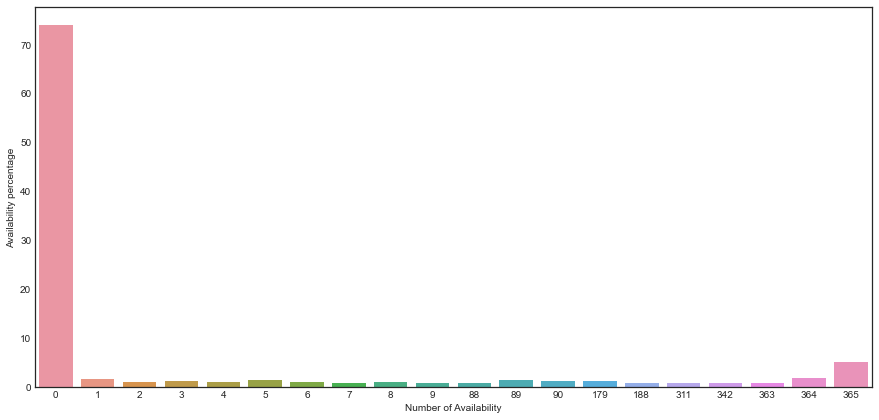

In [20]:
availability_365,count = get_count(df_airbnb['availability_365'], limit=20)
plot(availability_365, count, x_label="Number of Availability",y_label="Availability percentage", 
     title=None, figsize=(15,7), type='bar')


C:\Users\candy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


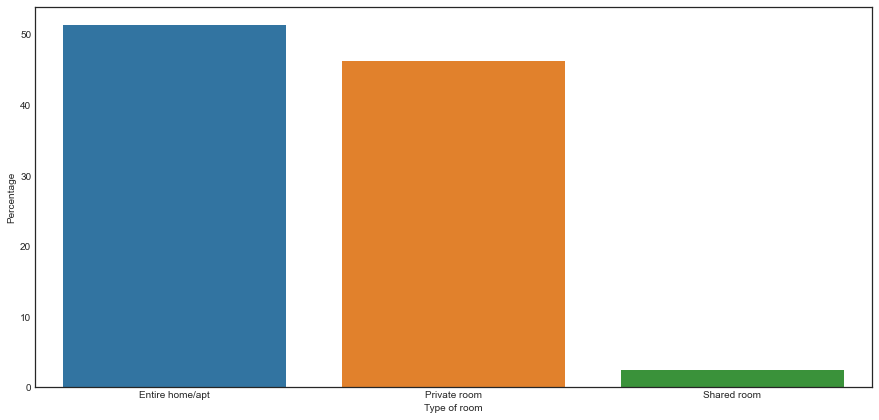

In [21]:
room_type,count = get_count(df_airbnb['room_type'], limit=20)
plot(room_type, count, x_label="Type of room",y_label="Percentage", title=None, figsize=(15,7), type='bar')

In [22]:
print("Find most important features relative to target")
corr = df_airbnb.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

Find most important features relative to target
price                             1.000000
availability_365                  0.100313
latitude                          0.054906
calculated_host_listings_count    0.050885
host_id                           0.019705
minimum_nights                    0.016055
number_of_reviews                -0.053392
reviews_per_month                -0.057007
longitude                        -0.231372
Name: price, dtype: float64


In [23]:
df_airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], 
               axis=1, inplace=True)

df_airbnb

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0
...,...,...,...,...,...,...
48890,Brooklyn,Private room,70,2,2,9
48891,Brooklyn,Private room,40,4,2,36
48892,Manhattan,Entire home/apt,115,10,1,27
48893,Manhattan,Shared room,55,1,6,2


In [24]:
#Categorical values--- Feature Engineering

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df_airbnb['neighbourhood_group'] = labelencoder.fit_transform(df_airbnb['neighbourhood_group'])
df_airbnb['room_type'] = labelencoder.fit_transform(df_airbnb['room_type'])

df_airbnb

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,1,1,149,1,6,365
1,2,0,225,1,2,355
2,2,1,150,3,1,365
3,1,0,89,1,1,194
4,2,0,80,10,1,0
...,...,...,...,...,...,...
48890,1,1,70,2,2,9
48891,1,1,40,4,2,36
48892,2,0,115,10,1,27
48893,2,2,55,1,6,2


In [25]:
#Now model


from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [26]:
X = df_airbnb.iloc[:,[0,1,3,4,5]]
Y = df_airbnb['price']

X

,neighbourhood_group,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,1,1,1,6,365
1,2,0,1,2,355
2,2,1,3,1,365
3,1,0,1,1,194
4,2,0,10,1,0
...,...,...,...,...,...
48890,1,1,2,2,9
48891,1,1,4,2,36
48892,2,0,10,1,27
48893,2,2,1,6,2


In [27]:
#checking one more time

categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index([], dtype='object')

In [28]:


from sklearn.model_selection import cross_val_score, train_test_split


X_train, X_test, t_train, t_test = train_test_split(X, Y, test_size= 0.2)

print(X.shape, X_train.shape, X_test.shape, t_train.shape, t_test.shape)




(47962, 5) (38369, 5) (9593, 5) (38369,) (9593,)


In [29]:
#linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
from sklearn.metrics import classification_report

linear_model = LinearRegression()
linear_model.fit(X_train,t_train)

linear_pred_test = linear_model.predict(X_test)
linear_pred_train = linear_model.predict(X_train)





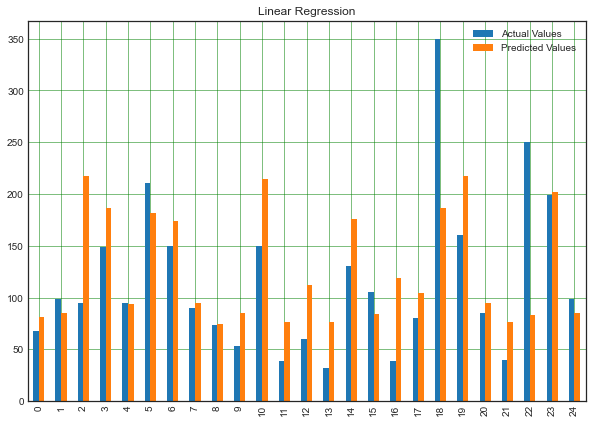

,Actual Values,Predicted Values
0,68,81.442983
1,99,84.737120
2,95,217.400393
3,149,185.972650
4,95,94.167845
5,211,181.766361
6,150,173.582128
7,90,94.839800
8,73,74.685646
9,53,85.459953


In [30]:
error_diff_hp = pd.DataFrame({'Actual Values': np.array(t_test).flatten(), 'Predicted Values': linear_pred_test.flatten()})
error_diff_hp.head(20)

#Visualize the error
df1 = error_diff_hp.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Linear Regression')
plt.show()

error_diff_hp.head(20)

In [31]:
#RandomForest
from sklearn.ensemble  import RandomForestRegressor


RFTree=RandomForestRegressor()
RFTree.fit(X_train,t_train)
rftree_pred=RFTree.predict(X_test)


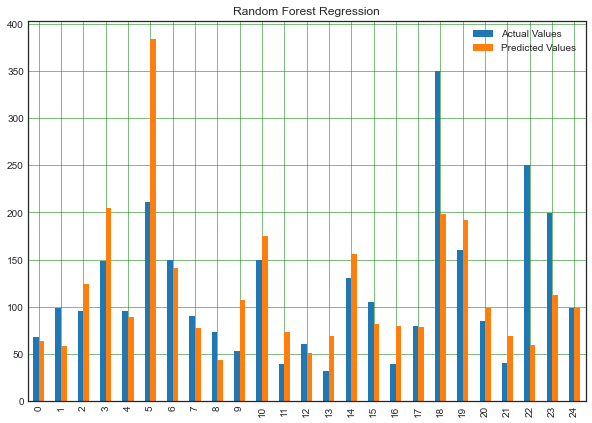

,Actual Values,Predicted Values
0,68,64.114167
1,99,57.853333
2,95,123.760000
3,149,204.567677
4,95,89.544655
5,211,384.227143
6,150,141.114713
7,90,77.300144
8,73,43.225000
9,53,107.590645


In [32]:
error_diff_hp = pd.DataFrame({'Actual Values': np.array(t_test).flatten(), 'Predicted Values': rftree_pred.flatten()})
#print(error_diff_hp.head(20))

#Visualize the error
df1 = error_diff_hp.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Random Forest Regression')
plt.show()

error_diff_hp.head(20)

In [68]:
#XGBRegressor
import xgboost as xgb

xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, t_train)

xgbr = xgbr.predict(X_test)

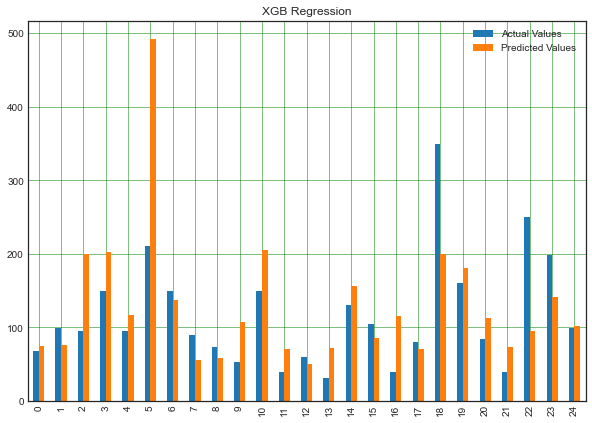

,Actual Values,Predicted Values
0,68,74.768234
1,99,75.888504
2,95,199.808105
3,149,202.394638
4,95,117.389870
5,211,492.713165
6,150,136.876846
7,90,55.152679
8,73,58.011780
9,53,108.000237


In [69]:
error_diff_hp = pd.DataFrame({'Actual Values': np.array(t_test).flatten(), 'Predicted Values': xgbr.flatten()})
#print(error_diff_hp.head(20))

#Visualize the error
df1 = error_diff_hp.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('XGB Regression')
plt.show()

error_diff_hp.head(20)

In [70]:
#'------------All RMSE-----------')

L_RMSE = np.sqrt(mean_squared_error(t_test, linear_pred_test))
L_R2 = r2_score(t_test, linear_pred_test)

RF_RMSE =  np.sqrt(mean_squared_error(t_test,rftree_pred))
RF_R2 = r2_score(t_test,rftree_pred)

XGBR_RMSE = np.sqrt(mean_squared_error(t_test,xgbr))
XGBR_R2= r2_score(t_test,xgbr)

In [71]:
data = {
  "   RMSE    ": [L_RMSE, RF_RMSE,XGBR_RMSE],
    "R2_Score ":[L_R2, RF_R2,XGBR_R2]
  
}


df_standard = pd.DataFrame(data,index = ["Linear Regression", "Random Forest Regressor","XGBoost Regressor"])

df_standard

,RMSE,R2_Score
Linear Regression,115.417224,0.194393
Random Forest Regressor,113.126609,0.226052
XGBoost Regressor,105.960626,0.320998


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [40]:
booster = xgb.XGBRegressor()

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# create Grid
param_grid = {
            "max_depth" : [4,16,1]}

booster_grid_search = RandomizedSearchCV(booster, param_grid, cv=3, n_jobs=-1)


booster_grid_search.fit(X_train, t_train)


print(booster_grid_search.best_params_)

{'max_depth': 4}


In [53]:
# Running the model tuned model

booster = xgb.XGBRegressor(max_depth = 4)

# train
booster.fit(X_train, t_train)

# predict
booster_pred_RSCV = booster.predict(X_test)

print('RMSE: %f' % np.sqrt(mean_squared_error(t_test,booster_pred_RSCV))) 


RSCV_score = np.sqrt(mean_squared_error(t_test,booster_pred_RSCV))

RMSE: 105.095723


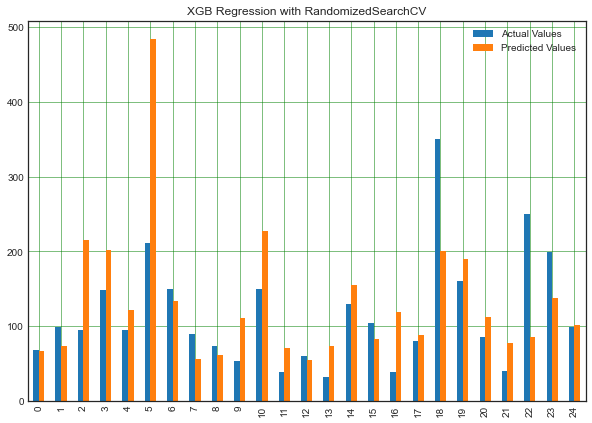

,Actual Values,Predicted Values
0,68,66.965195
1,99,73.950874
2,95,214.758698
3,149,202.590286
4,95,121.578445
5,211,484.546936
6,150,134.363129
7,90,56.553581
8,73,60.985634
9,53,110.766876


In [77]:
error_diff_hp = pd.DataFrame({'Actual Values': np.array(t_test).flatten(), 'Predicted Values': booster_pred_RSCV.flatten()})
#print(error_diff_hp.head(20))

#Visualize the error
df1 = error_diff_hp.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('XGB Regression with RandomizedSearchCV')
plt.show()

error_diff_hp.head(20)

In [56]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import warnings
warnings.filterwarnings('ignore')

In [57]:
#Define the hyperopt objective.
def objective(space):
    print(space)
    clf = xgb.XGBRegressor(max_depth = int(space['max_depth']),)

    eval_set  = [( X_train, t_train), ( X_test, t_test)]

    clf.fit(X_train, t_train,
            eval_set=eval_set, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

    pred = clf.predict(X_test)
    mse_scr = mean_squared_error(t_test, pred)
    print("SCORE:", np.sqrt(mse_scr))
    #change the metric if you like
    return {'loss':mse_scr, 'status': STATUS_OK , 'model': clf}


space ={'max_depth': hp.quniform("x_max_depth", 4, 16, 1)
    }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)

{'max_depth': 10.0}                                                                                                    
SCORE:                                                                                                                 
105.75088226310692                                                                                                     
{'max_depth': 14.0}                                                                                                    
SCORE:                                                                                                                 
109.08858605523804                                                                                                     
{'max_depth': 5.0}                                                                                                     
SCORE:                                                                                                                 
104.68087413128394                      

SCORE:                                                                                                                 
107.21833719291273                                                                                                     
{'max_depth': 6.0}                                                                                                     
SCORE:                                                                                                                 
104.5731815507977                                                                                                      
{'max_depth': 5.0}                                                                                                     
SCORE:                                                                                                                 
104.68087413128394                                                                                                     
{'max_depth': 16.0}                     

109.9577048014018                                                                                                      
{'max_depth': 4.0}                                                                                                     
SCORE:                                                                                                                 
104.88306525704938                                                                                                     
{'max_depth': 9.0}                                                                                                     
SCORE:                                                                                                                 
105.36151230282853                                                                                                     
{'max_depth': 7.0}                                                                                                     
SCORE:                                  

In [58]:
best_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

print(best_model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [59]:
xgb_preds_best = best_model.predict(X_test)
xgb_score_best = mean_squared_error(t_test, xgb_preds_best, squared=False)
print('RMSE_Best_Model:', xgb_score_best)


#print('RMSE: %f' % np.sqrt(mean_squared_error(t_test,xgb_preds_best))) 


RMSE_Best_Model: 104.5731815507977


In [60]:
data = {"   RMSE    ": [RSCV_score, xgb_score_best]}


df_tuned = pd.DataFrame(data,index = ["RandomizedSearchCV", "Hyperopt"])

df_tuned

,RMSE
RandomizedSearchCV,105.095723
Hyperopt,104.573182


In [61]:
data = {
  "   RMSE    ": [L_RMSE, RF_RMSE,XGBR_RMSE,RSCV_score, xgb_score_best]
  
}


df_all = pd.DataFrame(data,index = ["Linear Regression", "Random Forest Regressor","XGBoost Regressor",
                                    "RandomizedSearchCV(XGB Regressor)", "Hyperopt(XGB Regressor)"])

df_all


,RMSE
Linear Regression,115.417224
Random Forest Regressor,113.126609
XGBoost Regressor,105.964552
RandomizedSearchCV(XGB Regressor),105.095723
Hyperopt(XGB Regressor),104.573182


In [78]:
data = {
  "   RMSE    ": [L_RMSE, RF_RMSE,XGBR_RMSE,RSCV_score, xgb_score_best]
  
}


df_all = pd.DataFrame(data,index = ["Linear Regression     ", "Random Forest Regressor     ","XGBoost Regressor    ",
                                    "RandomizedSearchCV(XGB Regressor)    ", "Hyperopt(XGB Regressor)    "])

df_all


,RMSE
Linear Regression,115.417224
Random Forest Regressor,113.126609
XGBoost Regressor,105.960626
RandomizedSearchCV(XGB Regressor),105.095723
Hyperopt(XGB Regressor),104.573182


In [63]:
error_diff_hp = pd.DataFrame({'Actual Values': np.array(t_test).flatten(), 'Predicted Values': xgb_preds_best.flatten()})
print(error_diff_hp.head(20))

    Actual Values  Predicted Values
0              68         70.308197
1              99         74.204086
2              95        179.519928
3             149        201.097519
4              95        113.080307
5             211        362.575989
6             150        138.659042
7              90         59.508053
8              73         54.381794
9              53        106.355232
10            150        180.647491
11             39         72.994659
12             60         71.314911
13             32         73.360229
14            130        156.436172
15            105         87.664093
16             39        106.910225
17             80         79.661240
18            350        200.778168
19            160        175.584671


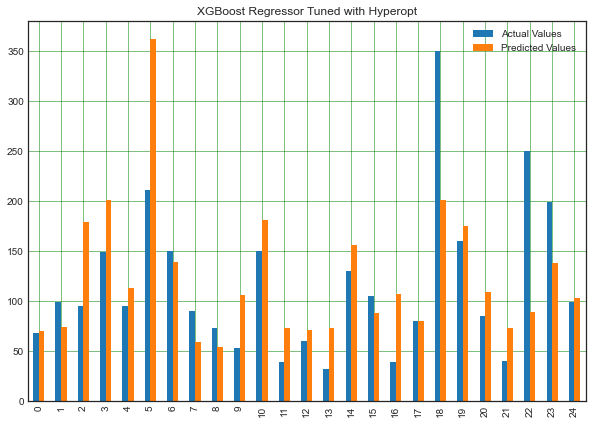

In [64]:


#Visualize the error
df1 = error_diff_hp.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('XGBoost Regressor Tuned with Hyperopt')
plt.show()